In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronikaazhar","key":"6e9c40f2d3213081dccb379ed822f5f7"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [10]:
!kaggle datasets download -d rabieelkharoua/asthma-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/222k [00:00<?, ?B/s]
100% 222k/222k [00:00<00:00, 75.1MB/s]


In [11]:
!unzip asthma-disease-dataset.zip -d asthma-disease-dataset
!ls asthma-disease-dataset

Archive:  asthma-disease-dataset.zip
  inflating: asthma-disease-dataset/asthma_disease_data.csv  
asthma_disease_data.csv


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [13]:
df = pd.read_csv("/content/asthma-disease-dataset/asthma_disease_data.csv")

In [14]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [17]:
df.drop(columns=['PatientID','BMI','PhysicalActivity','DietQuality','SleepQuality','PollutionExposure','PollenExposure','DustExposure','FamilyHistoryAsthma','HistoryOfAllergies','HistoryOfAllergies','HayFever','GastroesophagealReflux','LungFunctionFEV1','LungFunctionFVC','Wheezing','ShortnessOfBreath','ChestTightness','Coughing','NighttimeSymptoms','ExerciseInduced','DoctorInCharge'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             2392 non-null   int64
 1   Gender          2392 non-null   int64
 2   Ethnicity       2392 non-null   int64
 3   EducationLevel  2392 non-null   int64
 4   Smoking         2392 non-null   int64
 5   PetAllergy      2392 non-null   int64
 6   Eczema          2392 non-null   int64
 7   Diagnosis       2392 non-null   int64
dtypes: int64(8)
memory usage: 149.6 KB


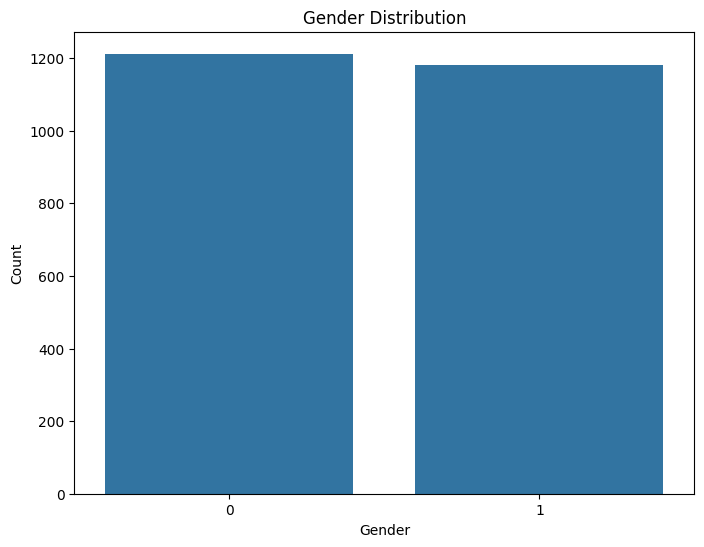

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [22]:
X = df.drop("Diagnosis",axis=1)
Y = pd.get_dummies(df['Diagnosis'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [24]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (1794, 7)
Shape of Y_train is: (1794, 2)

Shape of X_test is: (598, 7)
Shape of Y_test is: (598, 2)


In [25]:
input_dim = X.shape[1]

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
result = model.fit(X_train, Y_train, epochs = 20, batch_size = 10)

Epoch 1/20
180/180 [==============================] - 1s 3ms/step - loss: 0.2107 - accuracy: 0.9454
Epoch 2/20
180/180 [==============================] - 1s 3ms/step - loss: 0.2109 - accuracy: 0.9454
Epoch 3/20
180/180 [==============================] - 1s 3ms/step - loss: 0.2105 - accuracy: 0.9454
Epoch 4/20
180/180 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9454
Epoch 5/20
180/180 [==============================] - 1s 3ms/step - loss: 0.2108 - accuracy: 0.9454
Epoch 6/20
180/180 [==============================] - 1s 3ms/step - loss: 0.2109 - accuracy: 0.9454
Epoch 7/20
180/180 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9454
Epoch 8/20
180/180 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9454
Epoch 9/20
180/180 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9454
Epoch 10/20
180/180 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9454

In [31]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

19/19 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9565217391304348


In [33]:
model.save('./asthma.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model = tf.keras.models.load_model('./asthma.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./asthma.tflite", "wb").write(tflite_model)

2548